# Lecture 06-29

## Topics we still need to cover
 - APIs
 - Mapping
 
For more detail on python please see the Purdue DataMine web link: <a href="https://thedatamine.github.io/the-examples-book/python.html" target="_blank">Data Mine on Python</a>

Also see: <a href="https://docs.python.org/3/" target="_blank">Python 3.9.1 Documentation</a>

In [1]:
# Bring in the packages we have used before.

import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import requests

print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /Users/jvk/Documents/Teaching/2021-REEU/06-29-Tues


## Simple Mapping?

In [2]:
csv_file_name = 'cities-and-towns-of-the-united-states.csv'
my_file_name = 'Data/' + csv_file_name
my_new_file_name = 'Data/' + 'Wrangled-' + csv_file_name

# Open the file.

fin = open(my_file_name, "r")
line = fin.readline() #Read first line

print(line)
fields = line.split(';')
print(len(fields))
print(fields)
print()

for i in range(20):
    line = fin.readline()
    fields = line.split(';')
    print(len(fields))
    print(fields)
    print()

fin.close()

Geo Point;Geo Shape;GNIS ID;ANSICODE;FEATURE;FEATURE2;NAME;POP 2010;COUNTY;COUNTY FIPS;STATE;STATE FIPS;LATITUDE;LONGITUDE;PopPlLat;PopPlLong;ELEV IN M;ELEV IN FT

18
['Geo Point', 'Geo Shape', 'GNIS ID', 'ANSICODE', 'FEATURE', 'FEATURE2', 'NAME', 'POP 2010', 'COUNTY', 'COUNTY FIPS', 'STATE', 'STATE FIPS', 'LATITUDE', 'LONGITUDE', 'PopPlLat', 'PopPlLong', 'ELEV IN M', 'ELEV IN FT\n']

18
['44.2998540717,-120.834480347', '"{""type"": ""Point"", ""coordinates"": [-120.83448034701922, 44.299854071684514]}"', '1154317', '2411494', 'Civil', 'County Seat', 'Prineville', '9253', 'Crook', '013', 'OR', '41', '44.2998485', '-120.8344664', '44.2998485', '-120.8344664', '878', '2881\n']

18
['41.7354923486,-111.834399861', '"{""type"": ""Point"", ""coordinates"": [-111.83439986101921, 41.73549234864257]}"', '1442849', '2410856', 'Civil', 'County Seat', 'Logan', '48174', 'Cache', '005', 'UT', '49', '41.7354862', '-111.834388', '41.7354862', '-111.834388', '1382', '4534\n']

18
['39.3688793269,-107.

In [3]:
fin = open(my_file_name, "r")

# This creates the file and, if aleady exists, erases any 
# old content
fout = open(my_new_file_name, "w")
fout.close() 

# Read the first line containing header and split the line 
# string into fields on the comma separator. This returns a 
# list where each list element is one of comma delimited 
# strings. For the .csv files here there will be 21 
# substrings in each line. They are numbered from 0 to 20. 
# We want to retain numbers
# 4 ('FEATURE'), 5 ('FEATURE2'), 6 ('NAME'), 8 ('COUNTY'), 
# 9 ('COUNTY FIPS'), 10 ('STATE'), 11 ('STATE FIPS'), 
# 12 ('LATITUDE'), 13('LONGITUDE')
#
# The code below creates the header for the new csv file

line = fin.readline()
fin.close()

fields = line.split(';')
newline = fields[4] + ',' + fields[5] + ',' + fields[6] + ','
newline = newline + fields[8] + ',' + fields[9] + ','
newline = newline + fields[10] + ',' +fields[11] + ','
newline = newline + fields[12] + ',' +fields[13]

fout = open(my_new_file_name, "a")
print(newline, file=fout)
fout.close() 

# Now I want to go through the input csv line by line deleting 
# the superfluous fields and appending the new lines to the 
# "wrangled" file.

fin = open(my_file_name, "r")
fin.readline() # Read the header line and move to 2nd line

f = set()
f2 = set()
state = set()

fout = open(my_new_file_name, "a")

for line in fin:
    fields = line.split(';')
    newline = fields[4] + ',' + fields[5] + ',' + fields[6] + ','
    newline = newline + fields[8] + ',' + fields[9] + ','
    newline = newline + fields[10] + ',' +fields[11] + ','
    newline = newline + fields[12] + ',' +fields[13]    
    print(newline, file=fout)
    f.add(fields[4])
    f2.add(fields[5])
    state.add(fields[10])

fin.close()
fout.close()

In [4]:
f

{'Census', 'Civil', 'Locale', 'Place', 'Populated Place'}

In [5]:
f2

{'-999',
 'County Seat',
 'National Capital',
 'State Capital',
 'State Capital County Seat'}

In [6]:
print(state)

{'OK', 'CO', 'NH', 'AR', 'AL', 'KY', 'MS', 'AK', 'VA', 'IL', 'WY', 'MO', 'GA', 'OH', 'WV', 'HI', 'AZ', 'CA', 'KS', 'IN', 'WA', 'DE', 'VI', 'MT', 'MD', 'PA', 'NV', 'OR', 'TX', 'FL', 'NM', 'PR', 'ND', 'IA', 'VT', 'UT', 'RI', 'LA', 'SD', 'DC', 'NY', 'WI', 'NC', 'SC', 'ID', 'NE', 'MA', 'NJ', 'ME', 'MN', 'CT', 'MI', 'TN'}


In [7]:
fin = open(my_new_file_name, "r")
fin.readline() # Read the header line and move to 2nd line
k = 0

for line in fin:
    fields = line.split(',')
    T1 = fields[1] == 'State Capital County Seat'
    T2 = fields[1] == 'County Seat'
    if T1 or T2:
        k = k + 1
        
fin.close()

fin = open(my_new_file_name, "r")
fin.readline() # Read the header line and move to 2nd line
        
x = np.zeros(k)
y = np.zeros(k)

l = 0
for line in fin:
    fields = line.split(',')
    T1 = fields[1] == 'State Capital County Seat'
    T2 = fields[1] == 'County Seat'
    if T1 or T2:
        x[l] = float(fields[8])
        y[l] = float(fields[7])
        l = l + 1

fin.close()


In [8]:
print(x)
print(y)


[-120.8344664  -111.834388   -105.0166498  ... -103.5993477   -95.31316132
  -72.4475994 ]
[44.2998485 41.7354862 39.613321  ... 31.7051291 36.3008558 43.989788 ]


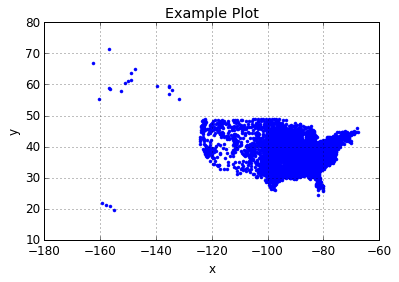

In [9]:
fig = plt.figure()
plt.style.use('classic')
plt.plot(x, y, '.')
plt.title("Example Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

## Playing with an API

In [10]:
response = requests.get("https://api.thedogapi.com/")
response.text

'{"message":"The Dog API"}'

In [11]:
response = requests.get("https://api.thedogapi.com/v1/breeds")
response.text

'[{"weight":{"imperial":"6 - 13","metric":"3 - 6"},"height":{"imperial":"9 - 11.5","metric":"23 - 29"},"id":1,"name":"Affenpinscher","bred_for":"Small rodent hunting, lapdog","breed_group":"Toy","life_span":"10 - 12 years","temperament":"Stubborn, Curious, Playful, Adventurous, Active, Fun-loving","origin":"Germany, France","reference_image_id":"BJa4kxc4X","image":{"id":"BJa4kxc4X","width":1600,"height":1199,"url":"https://cdn2.thedogapi.com/images/BJa4kxc4X.jpg"}},{"weight":{"imperial":"50 - 60","metric":"23 - 27"},"height":{"imperial":"25 - 27","metric":"64 - 69"},"id":2,"name":"Afghan Hound","country_code":"AG","bred_for":"Coursing and hunting","breed_group":"Hound","life_span":"10 - 13 years","temperament":"Aloof, Clownish, Dignified, Independent, Happy","origin":"Afghanistan, Iran, Pakistan","reference_image_id":"hMyT4CDXR","image":{"id":"hMyT4CDXR","width":606,"height":380,"url":"https://cdn2.thedogapi.com/images/hMyT4CDXR.jpg"}},{"weight":{"imperial":"44 - 66","metric":"20 - 30"

In [12]:
type(response.text)

str

In [13]:
# Put your developer key here as the string variable 

BlahThing=

In [14]:
URL1a="http://quickstats.nass.usda.gov/api/get_counts/?key="
URL1b=BlahThing
URL1c="&commodity_desc=WHEAT&year=1959&state_alpha=CO"
URL1 = URL1a + URL1b + URL1c

In [15]:
response = requests.get(URL1)
response.text

'{"count":2946}'

In [16]:
URL2a="http://quickstats.nass.usda.gov/api/get_counts/?key="
URL2b=URL1b
URL2c="&commodity_desc=WHEAT&year=1959&state_alpha=CO"
URL2 = URL2a + URL2b + URL2c
response = requests.get(URL2)
response.text



'{"count":2946}'

In [17]:
URL3a="http://quickstats.nass.usda.gov/api/api_GET/?key="
URL3b=URL1b
URL3c="&commodity_desc=WHEAT&year=1960&state_alpha=CO&format=CSV"

URL3 = URL3a + URL3b + URL3c
response = requests.get(URL3)
print(response.text)



"source_desc","sector_desc","group_desc","commodity_desc","class_desc","prodn_practice_desc","util_practice_desc","statisticcat_desc","unit_desc","short_desc","domain_desc","domaincat_desc","agg_level_desc","state_ansi","state_fips_code","state_alpha","state_name","asd_code","asd_desc","county_ansi","county_code","county_name","region_desc","zip_5","watershed_code","watershed_desc","congr_district_code","country_code","country_name","location_desc","year","freq_desc","begin_code","end_code","reference_period_desc","week_ending","load_time","Value","CV (%)"
"SURVEY","CROPS","FIELD CROPS","WHEAT","ALL CLASSES","ALL PRODUCTION PRACTICES","ALL UTILIZATION PRACTICES","AREA HARVESTED","ACRES","WHEAT - ACRES HARVESTED","TOTAL","NOT SPECIFIED","AGRICULTURAL DISTRICT","08","08","CO","COLORADO","10","NORTHWEST AND MOUNTAIN","","","","","","00000000","","","9000","UNITED STATES","COLORADO, NORTHWEST AND MOUNTAIN","1960","ANNUAL","00","00","YEAR","","2012-01-01 00:00:00","59,960",""
"SURVEY","CROP

In [18]:
type(response.text)

str